In [1]:
import numpy as np
import matplotlib.pyplot as plt


def draw_sphere(n):
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)

    ss, tt = np.meshgrid(s, t)

    x = np.cos(ss) * np.sin(tt)
    y = np.sin(ss) * np.sin(tt)
    z = np.cos(tt)

    print(x.shape, y.shape, z.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, alpha=0.5, linewidth=0.3).set_edgecolor('k')
    plt.show()

    return x, y, z


def transform(x, y, z, A):
    n = x.shape[0]

    for i in range(n):
        for j in range(n):
            vector = A @ np.array([x[i, j], y[i, j], z[i, j]])
            x[i, j] = vector[0]
            y[i, j] = vector[1]
            z[i, j] = vector[2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.5, linewidth=0.3).set_edgecolor('k')
    plt.show()
    return x, y, z

(20, 20) (20, 20) (20, 20)


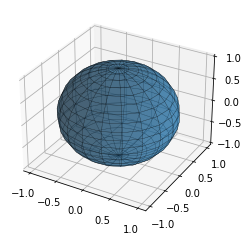

In [19]:
x, y, z = draw_sphere(20)
A = np.random.rand(3, 3).copy()

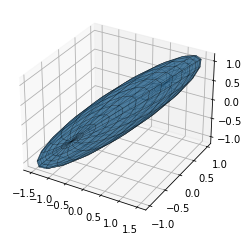

In [20]:
# elipsoida uzyskana przez mnożenie przez macierz A
x, y, z = transform(x.copy(), y.copy(), z.copy(), A)

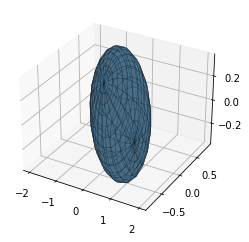

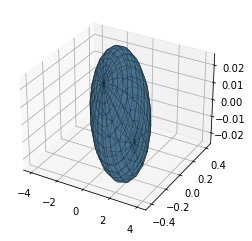

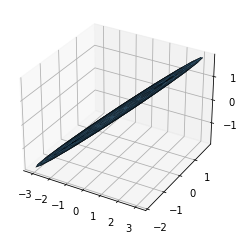

(array([[ 1.75293157,  1.75293157,  1.75293157,  1.75293157,  1.75293157,
          1.75293157,  1.75293157,  1.75293157,  1.75293157,  1.75293157,
          1.75293157,  1.75293157,  1.75293157,  1.75293157,  1.75293157,
          1.75293157,  1.75293157,  1.75293157,  1.75293157,  1.75293157],
        [ 1.9472361 ,  2.05422467,  2.1259727 ,  2.15470516,  2.13730844,
          2.07566776,  1.97646284,  1.85044406,  1.71126752,  1.57401516,
          1.45356039,  1.36295637,  1.31202144,  1.3062752 ,  1.34634033,
          1.42787517,  1.54204413,  1.67647526,  1.81660084,  1.9472361 ],
        [ 2.0884251 ,  2.29948388,  2.44102283,  2.497704  ,  2.46338511,
          2.34178515,  2.14608135,  1.89748126,  1.62292455,  1.35216371,
          1.11453988,  0.93580327,  0.83532279,  0.82398704,  0.90302444,
          1.06387005,  1.28909375,  1.55428907,  1.83071797,  2.0884251 ],
        [ 2.1726473 ,  2.48201916,  2.68948822,  2.77257199,  2.72226706,
          2.54402474,  2.25716035, 

In [21]:
# ta sama elipsoida uzyskana poprzez mnożenie przez kolejne macierze uzyskane z dekompozycji svd
u, s, vh = np.linalg.svd(A, full_matrices=True)

# rotacja
x, y, z = transform(x.copy(), y.copy(), z.copy(), vh)

# skalowanie
transform(x, y, z, np.diag(s))

# rotacja
transform(x, y, z, u)